In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

latcorners = [30, 48]
loncorners = [-7, 46]
lat_min, lat_max = latcorners
lon_min, lon_max = loncorners

basemap_obj = Basemap(
    projection='geos',
    rsphere=(6378137.0, 6356752.3142),
    resolution='i',
    area_thresh=10000.,
    lon_0=9.5,
    satellite_height=3.5785831E7,
    llcrnrlon=lon_min,
    llcrnrlat=lat_min,
    urcrnrlon=lon_max,
    urcrnrlat=lat_max)

x_center, y_center = basemap_obj(9.5, 0)

big_image_w, big_image_h = 1290, 420

# Calling a Basemap class instance with the arguments lon, lat
# will convert lon/lat (in degrees) to x/y map projection coordinates *(in meters)*:
Xmin, Ymin = basemap_obj(lon_min, lat_min)
Xmax, Ymax = basemap_obj(lon_max, lat_max)

# -> da metri a km
Xmin, Ymin = Xmin/1000.0, Ymin/1000.0
Xmax, Ymax = Xmax/1000.0, Ymax/1000.0

# quanti "pixel al km" in orizzontale e verticale
px_scale_x = big_image_w / (Xmax - Xmin)
px_scale_y = big_image_h / (Ymax - Ymin)

In [4]:
basemap_obj(-7, 30)

(4.6566128730773926e-09, 1.3969838619232178e-09)

In [38]:
print(f"Xmin, Ymin = {Xmin, Ymin} \t Xmax, Ymax = {Xmax, Ymax}")
print(f"Larghezza in km: {round(Xmax - Xmin, 1)} \t altezza in km: {round(Ymax - Ymin, 1)}")
print(f"pixel al km (x): {px_scale_x} \t pixel al km (y): {px_scale_y}")
print(f"km al pixel (x): {1/px_scale_x} \t km al pixel (y): {1/px_scale_y}")

Xmin, Ymin = (4.656612873077393e-12, 1.3969838619232178e-12) 	 Xmax, Ymax = (3870.070653520385, 1260.6826438542405)
Larghezza in km: 3870.1 	 altezza in km: 1260.7
pixel al km (x): 0.3333272478698965 	 pixel al km (y): 0.3331528375102788
km al pixel (x): 3.0000547701708373 	 km al pixel (y): 3.001625342510093


In [5]:
lon, lat, x, y = basemap_obj.makegrid(big_image_h, big_image_w, returnxy=True)

In [13]:
lon[1][1]-lon[0][0], lon[-2][-2]-lon[-1][-1]

(0.10272281529642502, -0.20753450830626718)

In [14]:
x[1][1]-x[0][0], x[-1][-1]-x[-2][-2]

(9236.445, 9236.25)

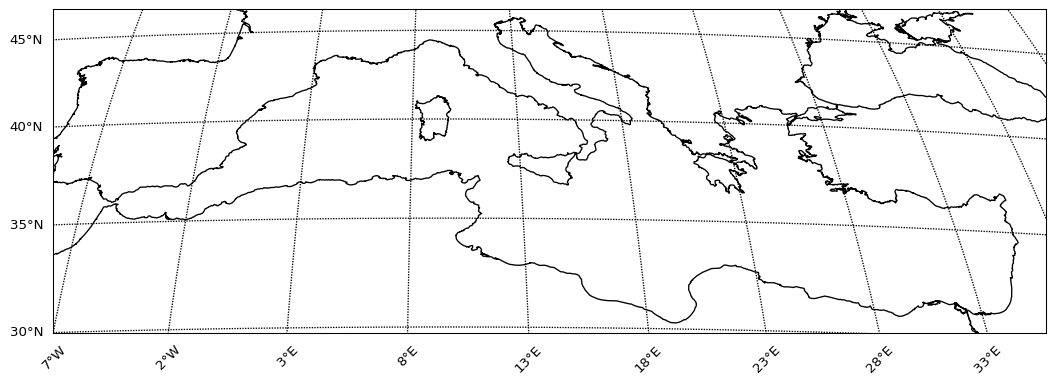

In [19]:
dpi = 96
fig = plt.figure(figsize=(big_image_w/dpi, big_image_h/dpi), dpi=dpi)
basemap_obj.drawcoastlines()
dparal=5.0 #separation in deg between drawn parallels
parallels = np.arange(lat_min,lat_max,dparal)
dmerid=5.0 #separation in deg between drawn meridians
meridians = np.arange(lon_min,lon_max,dmerid)
basemap_obj.drawparallels(parallels,labels=[1,0,0,0],fontsize=10);  #,weight='bold')
basemap_obj.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10, rotation=45);  #,weight='bold')


# ora ritrovo questi punti della griglia in coordinate pixel:
# lon, lat, x, y = basemap_obj.makegrid(big_image_h, big_image_w, returnxy=True)
# coords = np.array((lon,lat)).reshape(big_image_w, big_image_h, 2)
# print(coords.shape)
# for cx, cy in coords.reshape(-1,2):
#         # Disegniamo un piccolo cerchio intorno al centro
#             draw.ellipse(
#                 [
#                     (cx - point_radius, cy - point_radius),
#                     (cx + point_radius, cy + point_radius)
#                 ],
#                 fill=point_color
#         )

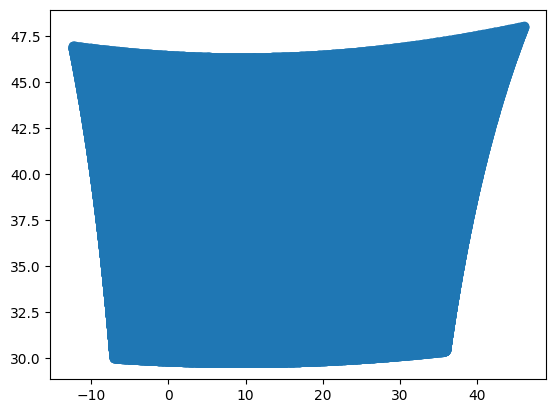

In [18]:
plt.scatter(lon,lat)

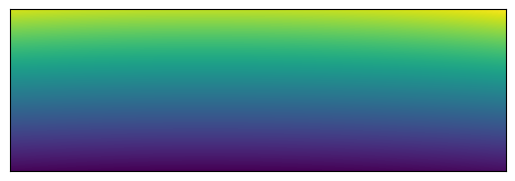

In [67]:
basemap_obj.imshow(lat)

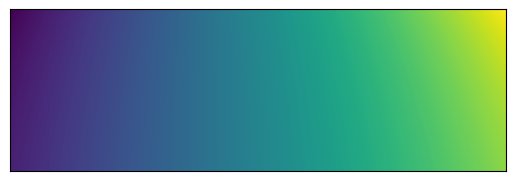

In [68]:
basemap_obj.imshow(lon)